パフォーマンスモニターをコマンドプロンプトの下記コマンドにてcsv形式に変換する。

In [ ]:
relog Performance_Counter.blg -o Performance_Counter.csv -f CSV

完成したcsvファイルは、下記の作業を前以って実施することで加工しやすくする。
[\\]、[' ']をなくし、別ファイルとして保存。

In [56]:
input_file = "C:\TANIGUCHIJUN_20170217-000001\Performance_Counter.csv"
with open(input_file, 'r') as csv_file:
    modified_counter = [listdata for listdata in csv_file if not(listdata == '\\' or listdata == ' ')]
    csv_file.close

modified_file = "C:\TANIGUCHIJUN_20170217-000001\modified_Counter.csv"
with open(modified_file, 'w') as csv_file:
    for modified_counter_P in modified_counter:
        csv_file.write(modified_counter_P)
    csv_file.close


加工したcsvファイルをpandasのread_csvメソッドにてデータフレーム形式で読み込む。

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

perlogs = pd.read_csv("C:\TANIGUCHIJUN_20170217-000001\modified_Counter.csv")
perlogs.head(5)

,(PDH-CSV4.0)(,TANIGUCHIJUNIPv6DatagramsReceivedDelivered/sec,TANIGUCHIJUNIPv6DatagramsReceivedUnknownProtocol,TANIGUCHIJUNIPv6FragmentedDatagrams/sec,TANIGUCHIJUNIPv6Datagrams/sec,TANIGUCHIJUNIPv6FragmentationFailures,TANIGUCHIJUNIPv6FragmentsRe-assembled/sec,TANIGUCHIJUNIPv6FragmentsReceived/sec,TANIGUCHIJUNIPv6DatagramsForwarded/sec,TANIGUCHIJUNIPv6DatagramsOutboundNoRoute,...,TANIGUCHIJUNProcess(UCManSvc)HandleCount,TANIGUCHIJUNProcess(winlogon)HandleCount,TANIGUCHIJUNProcess(igfxtray)HandleCount,TANIGUCHIJUNProcess(brs)HandleCount,TANIGUCHIJUNProcess(dwm)HandleCount,TANIGUCHIJUNProcess(lsm)HandleCount,TANIGUCHIJUNProcess(mmc)HandleCount,TANIGUCHIJUNProcess(UNS)HandleCount,TANIGUCHIJUNProcess(LMS)HandleCount,TANIGUCHIJUNProcess(CMA)HandleCount
0,02/17/201722:11:18.979,NaN,0,NaN,NaN,0,NaN,NaN,NaN,137,...,141,117,116,75,174,261,646,179,126,237
1,02/17/201722:11:19.936,1.058360,0,0.0,2.116720,0,0.0,0.0,0.0,137,...,141,117,116,75,174,261,647,179,126,237
2,02/17/201722:11:20.947,0.988977,0,0.0,0.988977,0,0.0,0.0,0.0,137,...,141,117,116,75,174,261,647,179,126,237
3,02/17/201722:11:21.949,0.000000,0,0.0,6.985967,0,0.0,0.0,0.0,137,...,141,117,116,75,174,261,647,179,126,237
4,02/17/201722:11:22.942,0.000000,0,0.0,0.000000,0,0.0,0.0,0.0,137,...,141,117,116,75,174,261,647,179,126,237


読み込んだデータフレームより実際に計測したい時刻部分のみを抽出する。

In [58]:
timestamps = []
jobs = []
#JOB起動時間
start_date_time = "2017-02-17 22:11:20.947"
#JOB終了時間
end_date_time   = "2017-02-17 22:14:00.949"

for timestamp in perlogs["(PDH-CSV4.0)("]:
    #"(PDH_CSV4.0)("列の時間フォーマットを扱いやすいフォーマットへ変換
    time = timestamp[-12:]
    date = timestamp[:10]
    timestamp = date + ' ' + time
    date_time = pd.to_datetime(timestamp)
    #実際に起動した時間のみ、JOB列にフラグ1を立てる
    if pd.to_datetime(start_date_time) < date_time and date_time < pd.to_datetime(end_date_time):
        job = 1
        timestamps.append(date_time) 
    else:
        job = 0
    jobs.append(job)

perlogs["TIMESTAMP"] = pd.Series(timestamps)
perlogs["JOB"] = pd.Series(jobs)
joblogs = perlogs[perlogs["JOB"] == 1]
joblogs.head(5)

,(PDH-CSV4.0)(,TANIGUCHIJUNIPv6DatagramsReceivedDelivered/sec,TANIGUCHIJUNIPv6DatagramsReceivedUnknownProtocol,TANIGUCHIJUNIPv6FragmentedDatagrams/sec,TANIGUCHIJUNIPv6Datagrams/sec,TANIGUCHIJUNIPv6FragmentationFailures,TANIGUCHIJUNIPv6FragmentsRe-assembled/sec,TANIGUCHIJUNIPv6FragmentsReceived/sec,TANIGUCHIJUNIPv6DatagramsForwarded/sec,TANIGUCHIJUNIPv6DatagramsOutboundNoRoute,...,TANIGUCHIJUNProcess(igfxtray)HandleCount,TANIGUCHIJUNProcess(brs)HandleCount,TANIGUCHIJUNProcess(dwm)HandleCount,TANIGUCHIJUNProcess(lsm)HandleCount,TANIGUCHIJUNProcess(mmc)HandleCount,TANIGUCHIJUNProcess(UNS)HandleCount,TANIGUCHIJUNProcess(LMS)HandleCount,TANIGUCHIJUNProcess(CMA)HandleCount,TIMESTAMP,JOB
3,02/17/201722:11:21.949,0.000000,0,0.0,6.985967,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:24.939,1
4,02/17/201722:11:22.942,0.000000,0,0.0,0.000000,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:25.944,1
5,02/17/201722:11:23.935,2.013869,0,0.0,3.020804,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:26.944,1
6,02/17/201722:11:24.939,0.000000,0,0.0,6.970841,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:27.945,1
7,02/17/201722:11:25.944,0.000000,0,0.0,0.000000,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:28.946,1


個別にデータフレームの列をそれぞれシリーズとして宣言

In [13]:
AvailableMBytes         = joblogs["TANIGUCHIJUNMemoryAvailableMBytes"]
DiskTime                = joblogs["TANIGUCHIJUNPhysicalDisk(0C:)%DiskTime"]
Pages_sec               = joblogs["TANIGUCHIJUNMemoryPages/sec"]
BytesTotal_sec          = joblogs["TANIGUCHIJUNNetworkInterface(TeredoTunnelingPseudo-Interface)BytesTotal/sec"]
Avg_DiskQueueLength     = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)Avg.DiskQueueLength"]
CurrentDiskQueueLength  = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)CurrentDiskQueueLength"]
DiskWrites_sec          = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)DiskWrites/sec"]
Processor_ProcessorTime = joblogs["TANIGUCHIJUNProcessor(_Total)%ProcessorTime"]
Process_ProcessorTime   = joblogs["TANIGUCHIJUNProcess(McTkSchedulerService)%ProcessorTime"]
UserTime                = joblogs["TANIGUCHIJUNProcessor(_Total)%UserTime"]
InterruptTime           = joblogs["TANIGUCHIJUNProcessor(_Total)%InterruptTime"]

必要な列のみで新たにデータフレームを作成し、csvファイルを作成する。

In [55]:
plt.figure();
plt.figure(figsize=(20, 20), dpi=80)

primelogs = pd.DataFrame()
primelogs["TimeStamp"] = timestamps
primelogs["AvailableMBytes"] = AvailableMBytes
primelogs["DiskTime"] = DiskTime
primelogs["Pages_sec"] = Pages_sec
primelogs["BytesTotal_sec"] = BytesTotal_sec
primelogs["Avg_DiskQueueLength"] = Avg_DiskQueueLength
primelogs["CurrentDiskQueueLength"] = CurrentDiskQueueLength
primelogs["DiskWrites_sec"] = DiskWrites_sec
primelogs["Processor_ProcessorTime"] = Processor_ProcessorTime
primelogs["Process_ProcessorTime"] = Process_ProcessorTime
primelogs["UserTime"] = UserTime
primelogs["InterruptTime"] = InterruptTime
#上記データフレームprimelogsをcsvファイルとしてファイルへ出力する。
primelogs.to_csv("C:\TANIGUCHIJUN_20170217-000001\prime_counter.csv", sep=",")
primelogs.head(10)
primelogs.describe()

,AvailableMBytes,DiskTime,Pages_sec,BytesTotal_sec,Avg_DiskQueueLength,CurrentDiskQueueLength,DiskWrites_sec,Processor_ProcessorTime,Process_ProcessorTime,UserTime,InterruptTime
count,156.000000,156.000000,156.000000,156.0,156.000000,156.000000,156.000000,156.000000,156.0,156.000000,156.000000
mean,1910.346154,59.516667,757.065573,0.0,0.726234,0.788462,58.938290,22.848289,0.0,10.742474,0.294888
std,42.182194,126.846159,1188.235555,0.0,1.266656,1.684884,92.811415,9.786541,0.0,9.302554,0.381044
min,1834.000000,0.060071,64.448945,0.0,0.022657,0.000000,1.970339,8.580320,0.0,1.928683,0.000000
25%,1875.750000,1.915639,420.688880,0.0,0.135906,0.000000,5.724051,16.065439,0.0,4.759176,0.000000
50%,1914.000000,4.245998,591.129750,0.0,0.200570,0.000000,18.545560,19.819428,0.0,7.090609,0.191136
75%,1928.250000,16.760390,749.166606,0.0,0.330122,1.000000,46.324501,25.668232,0.0,12.257730,0.393149
max,2003.000000,747.113146,12435.399386,0.0,7.665554,11.000000,394.127439,64.870207,0.0,48.155455,1.940988


上記データフレームで必要とされたカウンタのログをプロットし、その内容をPNG形式のファイルへ出力する。

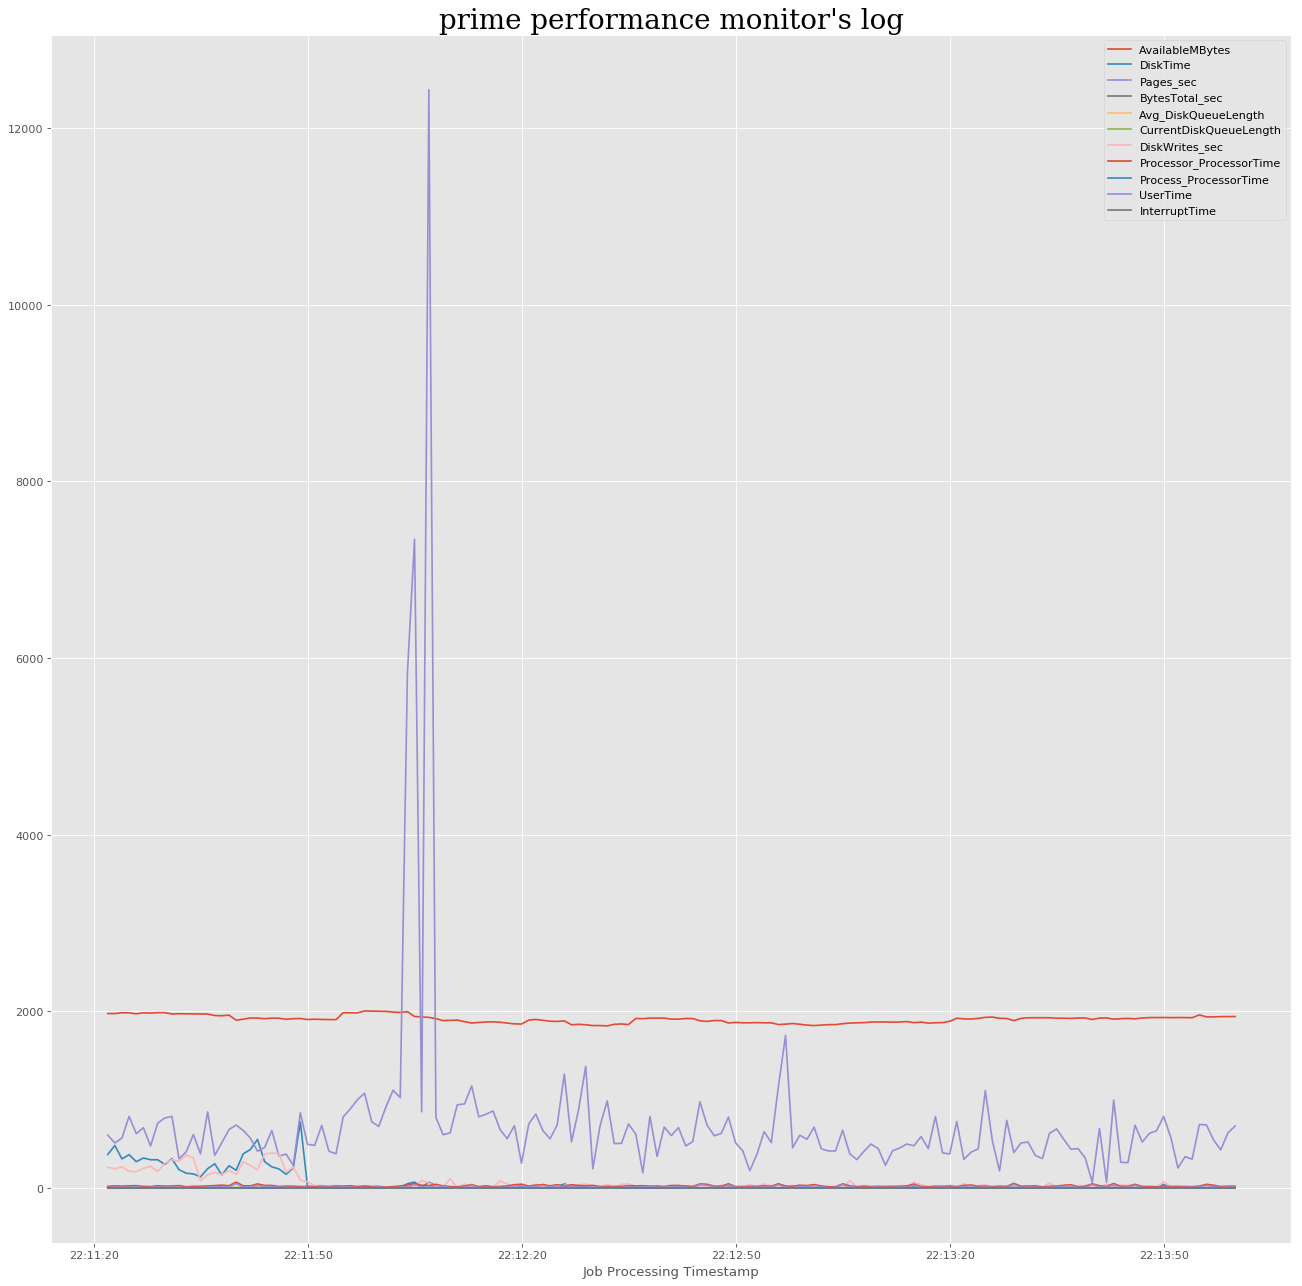

In [96]:
plt.figure()
plt.figure(figsize=(20, 20), dpi=80)
plt.style.use('ggplot')

plt.plot(timestamps, AvailableMBytes, label='AvailableMBytes')
plt.plot(timestamps, DiskTime, label='DiskTime')
plt.plot(timestamps, Pages_sec, label='Pages_sec')
plt.plot(timestamps, BytesTotal_sec, label='BytesTotal_sec')
plt.plot(timestamps, Avg_DiskQueueLength, label='Avg_DiskQueueLength')
plt.plot(timestamps, CurrentDiskQueueLength, label='CurrentDiskQueueLength')
plt.plot(timestamps, DiskWrites_sec, label='DiskWrites_sec')
plt.plot(timestamps, Processor_ProcessorTime, label='Processor_ProcessorTime')
plt.plot(timestamps, Process_ProcessorTime, label='Process_ProcessorTime')
plt.plot(timestamps, UserTime, label='UserTime')
plt.plot(timestamps, InterruptTime, label='InterruptTime')

plt.title("prime performance monitor's log", fontsize=25, fontname='serif') # タイトル
plt.xlabel("Job Processing Timestamp")
plt.legend(loc='upper right')
plt.grid(True)

#作成されたグラフをPNGファイル形式で下記のディレクトリへ格納
filename = filename = "C:\TANIGUCHIJUN_20170217-000001\prime_All_parameter.png"
plt.savefig(filename)

plt.show()

In [94]:
import numpy as np
#perlogs.interpolate()
plt.figure()
plt.style.use('ggplot')
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(11,figsize=(20,50), dpi=100)

plt.suptitle("prime performance monitor's log", fontsize=25)
#余白部分の間隔を下方向を0.05、上方向を0.95、左方向を0.075、右方向を0.95へ変更。
#横方向の図の間隔を0.4に、縦方向を0.15へ変更。
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.25)

ax1.set_title('AvailableMBytes', loc='left')
ax1.plot(timestamps, AvailableMBytes, linewidth=2)
ax1.grid(True)

ax2.set_title('DiskTime', loc='left')
ax2.plot(timestamps, DiskTime, linewidth=2)
ax2.grid(True)

ax3.set_title('Pages_sec', loc='left')
ax3.plot(timestamps, Pages_sec, linewidth=2)
ax3.grid(True)

ax4.set_title('BytesTotal_sec', loc='left')
ax4.plot(timestamps, BytesTotal_sec, linewidth=2)
ax4.grid(True)

ax5.set_title('Avg_DiskQueueLength', loc='left')
ax5.plot(timestamps, Avg_DiskQueueLength, linewidth=2)
ax5.grid(True)

ax6.set_title('CurrentDiskQueueLength', loc='left')
ax6.plot(timestamps, CurrentDiskQueueLength, linewidth=2)
ax6.grid(True)

ax7.set_title('DiskWrites_sec', loc='left')
ax7.plot(timestamps, DiskWrites_sec, linewidth=2)
ax7.grid(True)

ax8.set_title('Processor_ProcessorTime', loc='left')
ax8.plot(timestamps, Processor_ProcessorTime, linewidth=2)
ax8.grid(True)

ax9.set_title('Process_ProcessorTime', loc='left')
ax9.plot(timestamps, Process_ProcessorTime, linewidth=2)
ax9.grid(True)

ax10.set_title('UserTime', loc='left')
ax10.plot(timestamps, UserTime, linewidth=2)
ax10.grid(True)

ax11.set_title('InterruptTime', loc='left')
ax11.plot(timestamps, InterruptTime, linewidth=2)
ax11.grid(True)

#作成された画像ファイルを下記のディレクトリへ格納
filename = "C:\TANIGUCHIJUN_20170217-000001\prime_part_parameter.png"
plt.savefig(filename)

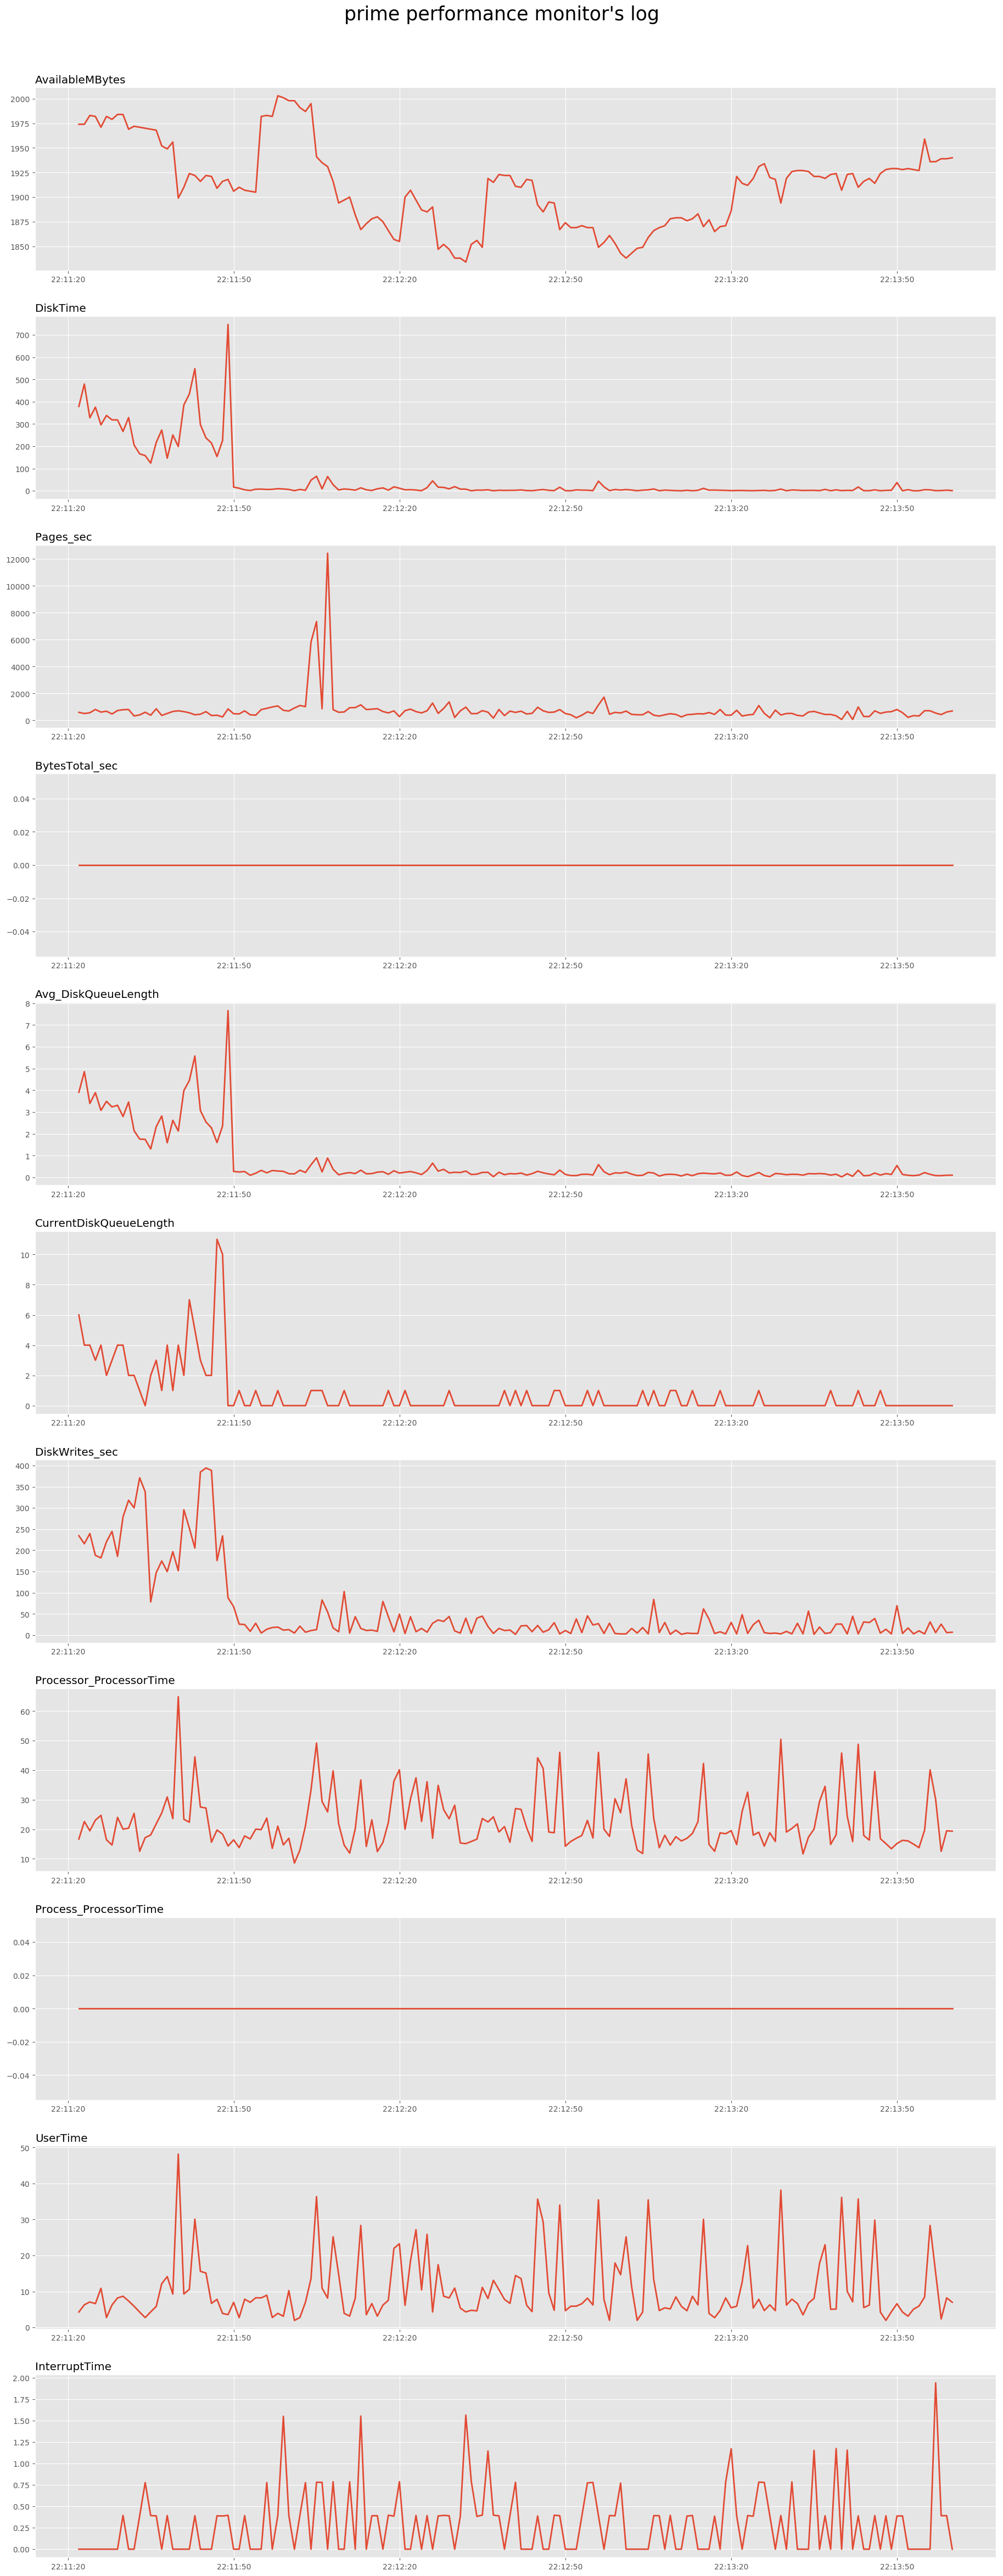

In [95]:
plt.show()